In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [110]:
path = "../data/GEFCOM2012/"
path2 = "../data/final_tables/composite/composite.csv"

In [113]:
df = pd.read_csv(path+"Load/Load_history.csv")
df2 = pd.read_csv(path2)

In [115]:
24*len(df), len(df2)

(792000, 197352)

In [73]:
# Melt the DataFrame to transform hour columns into rows
melted_df = df.melt(id_vars=['zone_id', 'year', 'month', 'day'], var_name='hour', value_name='load')

# Extract hour number from the 'hour' column and convert to integer
melted_df['hour'] = melted_df['hour'].str.extract('(\d+)').astype(int)

# Sort and optionally reset index
melted_df = melted_df.sort_values(by=['zone_id', 'year', 'month', 'day', 'hour']).reset_index(drop=True)

In [74]:
melted_df

,zone_id,year,month,day,hour,load
0,1,2004,1,1,1,"16,853"
1,1,2004,1,1,2,"16,450"
2,1,2004,1,1,3,"16,517"
3,1,2004,1,1,4,"16,873"
4,1,2004,1,1,5,"17,064"
...,...,...,...,...,...,...
791995,20,2008,7,7,20,NaN
791996,20,2008,7,7,21,NaN
791997,20,2008,7,7,22,NaN
791998,20,2008,7,7,23,NaN


In [77]:
df_cleaned = melted_df.dropna(subset=['load'])
df_cleaned['load'] = df_cleaned['load'].str.replace(',', '')
df_cleaned['load'] = pd.to_numeric(df_cleaned['load'], errors='coerce')
df_cleaned['load'] = df_cleaned['load'].astype(int)

/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [84]:
df_cleaned[df_cleaned['load'] == 0].groupby('zone_id')['load'].size().reset_index(name='nan_count')

,zone_id,nan_count
0,4,1
1,9,2


In [86]:
df_cleaned['load'].max()

540393

In [118]:
df_cleaned[df_cleaned['load'] > 500000]

,zone_id,year,month,day,hour,load
700372,18,2007,2,6,5,507109
700373,18,2007,2,6,6,538705
700374,18,2007,2,6,7,540393
700375,18,2007,2,6,8,538047
700376,18,2007,2,6,9,528226
700422,18,2007,2,8,7,503102
700423,18,2007,2,8,8,505738
708749,18,2008,1,21,6,506175
708750,18,2008,1,21,7,523504
708751,18,2008,1,21,8,519094


(array([4.3423e+04, 3.7445e+04, 1.8693e+04, 1.3744e+04, 1.7513e+04,
        2.5037e+04, 2.8549e+04, 2.7598e+04, 2.7371e+04, 2.5497e+04,
        2.0313e+04, 1.5597e+04, 1.1720e+04, 8.9420e+03, 7.9630e+03,
        7.4530e+03, 6.9160e+03, 6.1900e+03, 6.1960e+03, 6.4720e+03,
        6.4900e+03, 6.7400e+03, 7.9600e+03, 1.0777e+04, 1.0781e+04,
        8.2020e+03, 7.6680e+03, 8.6440e+03, 1.1344e+04, 1.1905e+04,
        9.5750e+03, 7.4290e+03, 6.9970e+03, 7.4470e+03, 6.6490e+03,
        6.2680e+03, 5.6030e+03, 5.3830e+03, 5.2460e+03, 5.2460e+03,
        4.9460e+03, 4.9000e+03, 4.8020e+03, 4.6680e+03, 4.6980e+03,
        4.6340e+03, 4.6860e+03, 4.6120e+03, 4.5360e+03, 4.5420e+03,
        4.5530e+03, 4.6300e+03, 4.6550e+03, 4.8050e+03, 4.7590e+03,
        4.8330e+03, 5.0090e+03, 5.0700e+03, 5.2120e+03, 5.5600e+03,
        5.7540e+03, 6.0950e+03, 6.1430e+03, 6.2130e+03, 6.4290e+03,
        6.3260e+03, 6.0000e+03, 5.8260e+03, 5.3690e+03, 5.1400e+03,
        4.9800e+03, 4.6240e+03, 4.7500e+03, 4.26

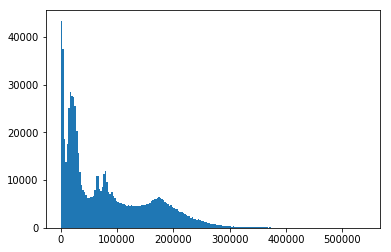

In [91]:
plt.hist(df_cleaned['load'], bins=200)

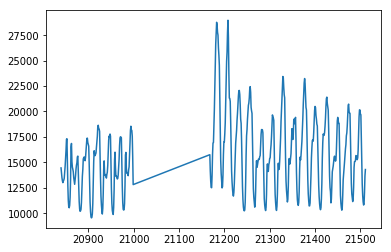

In [109]:
start=20000
plt.plot(df_cleaned['load'][start:start+24*7*3])

(array([27., 33., 24., 27., 26., 28., 21., 10.,  2.,  2.]),
 array([12891. , 14633.8, 16376.6, 18119.4, 19862.2, 21605. , 23347.8,
        25090.6, 26833.4, 28576.2, 30319. ]),
 <a list of 10 Patch objects>)

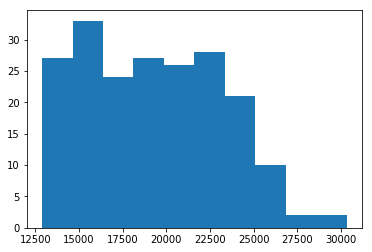

In [99]:
plt.hist(df_cleaned['load'][10300:10500])

In [79]:
melted_df[melted_df['load'].isna()].groupby('zone_id')['load'].size().reset_index(name='nan_count')

,zone_id,nan_count
0,1,1530
1,2,1530
2,3,1530
3,4,1530
4,5,1530
5,6,1530
6,7,1530
7,8,1530
8,9,1530
9,10,1530


In [34]:
from datetime import datetime, timedelta

# Define the start and end dates of the missing periods
missing_periods = [
    ("2005-03-06", "2005-03-12"),
    ("2005-06-20", "2005-06-26"),
    ("2005-09-10", "2005-09-16"),
    ("2005-12-25", "2005-12-31"),
    ("2006-02-13", "2006-02-19"),
    ("2006-05-25", "2006-05-31"),
    ("2006-08-02", "2006-08-08"),
    ("2006-11-22", "2006-11-28"),
]

# Generate a list of all dates within these ranges
missing_dates = []
for start, end in missing_periods:
    start_date = datetime.strptime(start, "%Y-%m-%d")
    end_date = datetime.strptime(end, "%Y-%m-%d")
    delta = end_date - start_date
    for i in range(delta.days + 1):
        day = start_date + timedelta(days=i)
        missing_dates.append(day.date())

# Convert missing_dates to a DataFrame for easier manipulation
missing_dates_df = pd.DataFrame(missing_dates, columns=['date'])

# Assuming your DataFrame 'melted_df' has 'year', 'month', and 'day' columns, create a 'date' column for comparison
melted_df['date'] = pd.to_datetime(melted_df[['year', 'month', 'day']])

# Check if the NaN values in 'load' correspond to these missing dates
nan_in_missing_dates = melted_df[melted_df['date'].isin(missing_dates) & melted_df['load'].isna()]

# Count of NaNs in the specified missing periods
nan_count_in_missing_dates = nan_in_missing_dates.shape[0]

nan_count_in_missing_dates


26880

In [39]:
total_nan_values = melted_df['load'].isna().sum()
total_nan_values

30600

In [41]:
# Check if NaN values occur more frequently during specific hours
hourly_nan_distribution = melted_df[melted_df['load'].isna()].groupby('hour').size().reset_index(name='nan_count_per_hour')

# Check for day-wise distribution of NaN values
daily_nan_distribution = melted_df[melted_df['load'].isna()].groupby('day').size().reset_index(name='nan_count_per_day')

# Check for month-wise distribution of NaN values
monthly_nan_distribution = melted_df[melted_df['load'].isna()].groupby('month').size().reset_index(name='nan_count_per_month')

# Check for year-wise distribution of NaN values
yearly_nan_distribution = melted_df[melted_df['load'].isna()].groupby('year').size().reset_index(name='nan_count_per_year')

In [30]:
hourly_nan_distribution


,hour,nan_count_per_hour
0,1,1260
1,2,1260
2,3,1260
3,4,1260
4,5,1260
5,6,1260
6,7,1280
7,8,1280
8,9,1280
9,10,1280


In [31]:
daily_nan_distribution


,day,nan_count_per_day
0,1,480
1,2,960
2,3,960
3,4,960
4,5,960
5,6,1440
6,7,1440
7,8,960
8,9,480
9,10,960


In [32]:
monthly_nan_distribution

,month,nan_count_per_month
0,2,3360
1,3,3360
2,5,3360
3,6,3720
4,7,3360
5,8,3360
6,9,3360
7,11,3360
8,12,3360


In [33]:
yearly_nan_distribution

,year,nan_count_per_year
0,2005,13440
1,2006,13440
2,2008,3720
